## Desafio Coder - Data Storytelling
#### Alumno: Diego Venegas Gonzalez

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset - Riesgo de incumplimiento de pagos
Este conjunto de datos contiene información sobre pagos predeterminados, factores demográficos, datos crediticios, historial de pagos y estados de cuenta de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005. El objetivo principal es estimar la probabilidad de incumplimiento de pago de los clientes.

#### Descripción de las variables:
- ID: ID de cada cliente
- LIMIT_BAL: monto del crédito otorgado en dólares NT (incluye crédito individual y familiar/suplementario)
- SEX: Género (1=masculino, 2=femenino)
- EDUCATION: (1=graduado, 2=universidad, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)
- MARRIAGE: Estado civil (1=casado, 2=soltero, 3=otros)
- AGE: Edad en años
- PAY_1: estado de pago en septiembre de 2005 (-1=pago debido, 1=retraso en el pago de un mes, 2=retraso en el pago de dos meses, ...8=retraso en el pago de ocho meses, 9=retraso en el pago de nueve meses o más)
- PAY_2: Estado de pago en agosto de 2005 (escala igual a la anterior)
- PAY_3: Estado de pago en julio de 2005 (escala igual a la anterior)
- PAY_4: Estado de pago en junio de 2005 (escala igual a la anterior)
- PAY_5: Estado de pago en mayo de 2005 (escala igual a la anterior)
- PAY_6: Estado de pago en abril de 2005 (escala igual a la anterior)
- BILL_AMT1: Importe del estado de cuenta en septiembre de 2005 (dólar NT)
- BILL_AMT2: Importe del estado de cuenta en agosto de 2005 (dólar NT)
- BILL_AMT3: Importe del estado de cuenta en julio de 2005 (dólar NT)
- BILL_AMT4: Importe del estado de cuenta en junio de 2005 (dólar NT)
- BILL_AMT5: Importe del estado de cuenta en mayo de 2005 (dólar NT)
- BILL_AMT6: Importe del estado de cuenta en abril de 2005 (dólar NT)
- PAY_AMT1: Importe del pago anterior en septiembre de 2005 (dólar NT)
- PAY_AMT2: Importe del pago anterior en agosto de 2005 (dólar NT)
- PAY_AMT3: Importe del pago anterior en julio de 2005 (dólar NT)
- PAY_AMT4: Importe del pago anterior en junio de 2005 (dólar NT)
- PAY_AMT5: Importe del pago anterior en mayo de 2005 (dólar NT)
- PAY_AMT6: Importe del pago anterior en abril de 2005 (dólar NT)
- DEFAULT: Pago predeterminado (1=sí, 0=no)

### Contexto Comercial

Uno de los principales ingresos de los bancos son los préstamos a los clientes. La ganancia de los bancos radica en los intereses que le cobran por el préstamo, el cual varía para cada cliente y está sujeto a diferentes factores. Uno de los factores más importantes es el riesgo, y este se calcula por las distintas variables que tiene el cliente, como por ejemplo su edad, sus ingresos mensuales, su historial crediticio, etc. Sin embargo, existen algunos clientes a los cuales les prestan dinero y luego terminan incumpliendo los pagos, lo cual termina perjudicando a los bancos. Esta práctica se ha vuelto algo frecuente en algunas personas, ya que saben que no hay cárcel por incumplimiento de pagos. Por lo tanto, el objetivo de este proyecto es poder identificar a los clientes que van a incumplir los pagos para así minimizar las pérdidas del banco y la utilidad sea mayor.

#### Objetivo Principal:
- Identificar a los clientes de un banco que tengan alto riesgo de incumplimiento de pago utilizando técnicas de data science y modelos de machine learning 

#### Objetivos Secundarios:
- Identificar los factores más influyentes en el riesgo de incumplimiento de pago
- Desarrollar un sistema automatizado para calificar el riesgo de impago de los clientes.
- Evaluar la precisión y eficacia del modelo
- Implementar soluciones para reducir el riesgo de impago
- Mejorar la toma de decisiones de la empresa en cuanto a la asignación de crédito a los clientes

#### Motivación y Audiencia:
El público al cual va dirigido este proyecto es el siguiente: los directores, los gerentes del banco, las principales jefaturas, los empleados de la unidad de crédito y el equipo de data science.

Lo que se espera tras la ejecución de este proyecto es:
- Tener una mejor comprensión de los factores que contribuyen al riesgo de impago, lo que permitirá a la empresa tomar medidas más informadas para prevenirlo.
- Un sistema automatizado de calificación de riesgo que mejore la eficiencia y la precisión en comparación de los métodos tradicionales
- Una reducción en el número de impagos y una mejora en la tasa de recuperación de deudas
- Una mejora en la toma de decisiones en cuanto a la asignación de crédito a los clientes, lo que aumentará la seguridad y la rentabilidad de la empresa
- Una ventaja competitiva al ser capaces de ofrecer una mejor evaluación de riesgo a los clientes y potenciales clientes, lo que aumentará la satisfacción y lealtad de los clientes.

In [2]:
df = pd.read_csv("datacredit.csv") 

In [3]:
df.shape

(30000, 25)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Análisis Exploratorio de Datos (EDA)

In [8]:
# Revisamos los valores nulos o missings!
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

#### Análisis Univariado

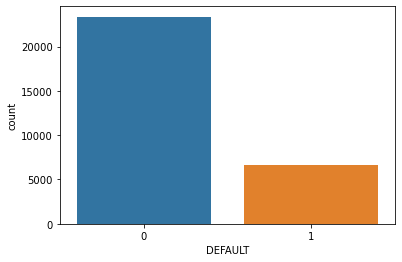

In [9]:
sns.countplot(data=df,x='DEFAULT')
ax=sns.countplot(data=df,x='DEFAULT')

In [10]:
## Calculando la proporción del Target
df.DEFAULT.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

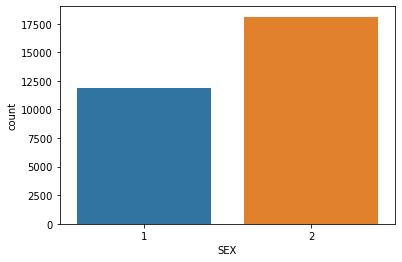

In [11]:
sns.countplot(data=df,x='SEX')
ax=sns.countplot(data=df,x='SEX')

In [12]:
df.groupby('SEX').DEFAULT.value_counts(normalize=True).unstack(fill_value=0)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


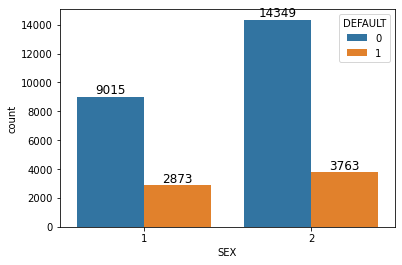

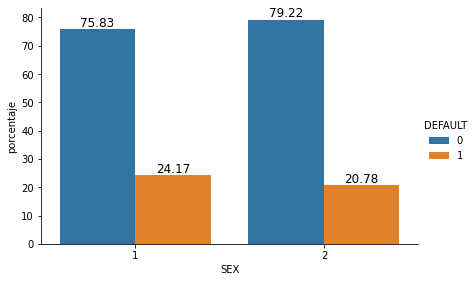

In [13]:
sns.countplot(x="SEX", hue="DEFAULT", data=df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')
    
porcentaje_genero_pagado = df.groupby(["SEX", "DEFAULT"]).size().reset_index(name='total')
porcentaje_genero_total = df.groupby(["SEX"]).size().reset_index(name='total')
porcentaje_genero = porcentaje_genero_pagado.merge(porcentaje_genero_total, on="SEX")
porcentaje_genero["porcentaje"] = porcentaje_genero["total_x"] / porcentaje_genero["total_y"] * 100

g = sns.catplot(x="SEX", y="porcentaje", hue="DEFAULT", data=porcentaje_genero, kind="bar", height=4, aspect=1.5)

for ax in g.axes.flat:
    for p in ax.patches:
        label = format(p.get_height(), '.2f')
        ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

plt.show()

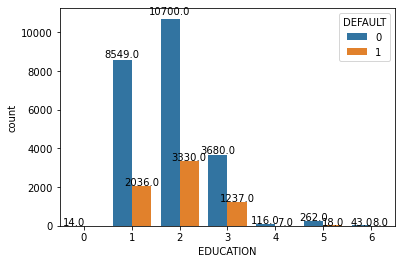

In [14]:
ax = sns.countplot(x="EDUCATION", hue="DEFAULT", data=df)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height*1.02), ha='center')
plt.show()

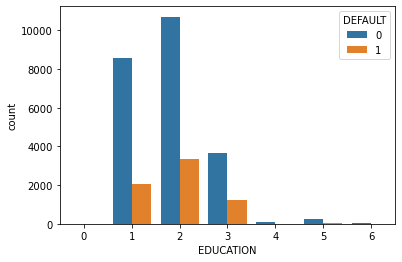

In [15]:
ax=sns.countplot(data=df,x='EDUCATION',hue="DEFAULT")

<AxesSubplot:xlabel='DEFAULT', ylabel='EDUCATION'>

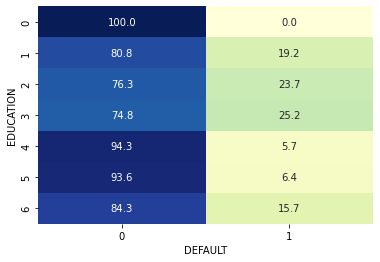

In [16]:
tabla_educacion = pd.crosstab(index=df["EDUCATION"], columns=df["DEFAULT"])
tabla_porcentajes = tabla_educacion.apply(lambda r: r/r.sum()*100, axis=1)
sns.heatmap(tabla_porcentajes, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False)

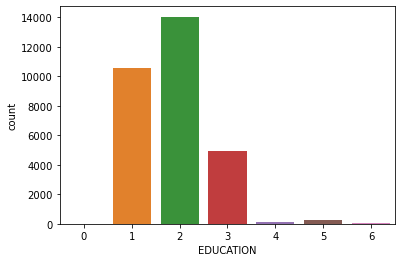

In [17]:
sns.countplot(data=df,x='EDUCATION')
ax=sns.countplot(data=df,x='EDUCATION')

In [18]:
df.groupby('EDUCATION').DEFAULT.value_counts(normalize=True).unstack(fill_value=0)

DEFAULT,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.935714,0.064286
6,0.843137,0.156863


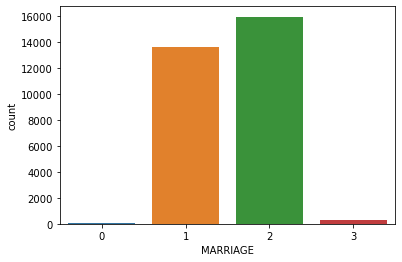

In [19]:
sns.countplot(data=df,x='MARRIAGE')
ax=sns.countplot(data=df,x='MARRIAGE')

<AxesSubplot:xlabel='DEFAULT', ylabel='MARRIAGE'>

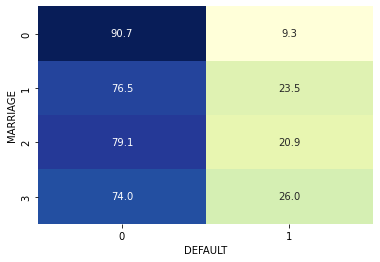

In [20]:
tabla_marriage = pd.crosstab(index=df["MARRIAGE"], columns=df["DEFAULT"])
tabla_porcent2 = tabla_marriage.apply(lambda r: r/r.sum()*100, axis=1)
sns.heatmap(tabla_porcent2, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False)

In [21]:
df.groupby('MARRIAGE').DEFAULT.value_counts(normalize=True).unstack(fill_value=0)

DEFAULT,0,1
MARRIAGE,,
0,0.907407,0.092593
1,0.765283,0.234717
2,0.790717,0.209283
3,0.739938,0.260062


##### Contar Valores Nulos

In [22]:
# Función para calcular valores perdidos por columna
def missing_values_table(df):
        # Valores perdidos totales
        mis_val = df.isnull().sum()
        
        # Porcentaje de valores faltantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Nombres de columna
        #Columns = pd.Series(df_train.columns)
        # Haz una tabla con los resultados.
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,ignore_index= True)
        
        # Cambiar el nombre de las columnas
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Ordenar la tabla por porcentaje de faltante descendente
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Imprimir alguna información resumida
        print ("El conjunto de datos tiene " + str(df.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table.shape[0]) +
              " columnas que contienen valores perdidos.")
        
        # Devolver el marco de datos con información faltante
        return mis_val_table

In [23]:
mis_val_table = missing_values_table(df)
mis_val_table.tail(20)

El conjunto de datos tiene 24 columnas.
Hay 0 columnas que contienen valores perdidos.


,Missing Values,% of Total Values


In [24]:
def feature_type_split(data):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(df) 

In [25]:
f_c_numeric = df[num_list]
df_categorical = df[cat_list]
df_d_numeric = df[dis_num_list]

print("num_list",len(num_list))
print("cat_list",len(cat_list))
print("dis_num_list",len(dis_num_list))

num_list 14
cat_list 0
dis_num_list 10


In [26]:
import statistics
med_dispersion = pd.DataFrame()
med_dispersion['Media'] = df.mean()
med_dispersion['Mediana'] = df.median()
med_dispersion['Moda'] = df.mode().iloc[0]
print(med_dispersion)

                   Media   Mediana   Moda
LIMIT_BAL  167484.322667  140000.0  50000
SEX             1.603733       2.0      2
EDUCATION       1.853133       2.0      2
MARRIAGE        1.551867       2.0      2
AGE            35.485500      34.0     29
PAY_1          -0.016700       0.0      0
PAY_2          -0.133767       0.0      0
PAY_3          -0.166200       0.0      0
PAY_4          -0.220667       0.0      0
PAY_5          -0.266200       0.0      0
PAY_6          -0.291100       0.0      0
BILL_AMT1   51223.330900   22381.5      0
BILL_AMT2   49179.075167   21200.0      0
BILL_AMT3   47013.154800   20088.5      0
BILL_AMT4   43262.948967   19052.0      0
BILL_AMT5   40311.400967   18104.5      0
BILL_AMT6   38871.760400   17071.0      0
PAY_AMT1     5663.580500    2100.0      0
PAY_AMT2     5921.163500    2009.0      0
PAY_AMT3     5225.681500    1800.0      0
PAY_AMT4     4826.076867    1500.0      0
PAY_AMT5     4799.387633    1500.0      0
PAY_AMT6     5215.502567    1500.0

### Asimetría y Curtosis de las Variables

In [27]:
from scipy.stats import skew, kurtosis
asimetria = df.apply(lambda x: skew(x))
print('Asimetría de cada variable numérica:\n', asimetria)

Asimetría de cada variable numérica:
 LIMIT_BAL     0.992817
SEX          -0.424162
EDUCATION     0.970923
MARRIAGE     -0.018741
AGE           0.732209
PAY_1         0.731938
PAY_2         0.790525
PAY_3         0.840640
PAY_4         0.999579
PAY_5         1.008147
PAY_6         0.947982
BILL_AMT1     2.663728
BILL_AMT2     2.705086
BILL_AMT3     3.087676
BILL_AMT4     2.821824
BILL_AMT5     2.876236
BILL_AMT6     2.846502
PAY_AMT1     14.667631
PAY_AMT2     30.452295
PAY_AMT3     17.215775
PAY_AMT4     12.904340
PAY_AMT5     11.126861
PAY_AMT6     10.640195
DEFAULT       1.343437
dtype: float64


In [28]:
curtosis = df.apply(lambda x: kurtosis(x))
print('\nCurtosis de cada variable numérica:\n', curtosis)


Curtosis de cada variable numérica:
 LIMIT_BAL       0.535974
SEX            -1.820086
EDUCATION       2.078075
MARRIAGE       -1.363341
AGE             0.044096
PAY_1           2.720062
PAY_2           1.569956
PAY_3           2.083888
PAY_4           3.496201
PAY_5           3.988883
PAY_6           3.425763
BILL_AMT1       9.804455
BILL_AMT2      10.301029
BILL_AMT3      19.779758
BILL_AMT4      11.307240
BILL_AMT5      12.303630
BILL_AMT6      12.268460
PAY_AMT1      415.185337
PAY_AMT2     1641.358118
PAY_AMT3      564.216982
PAY_AMT4      277.287348
PAY_AMT5      180.033731
PAY_AMT6      167.133371
DEFAULT        -0.195178
dtype: float64


### Detección de Outliers con Boxplot

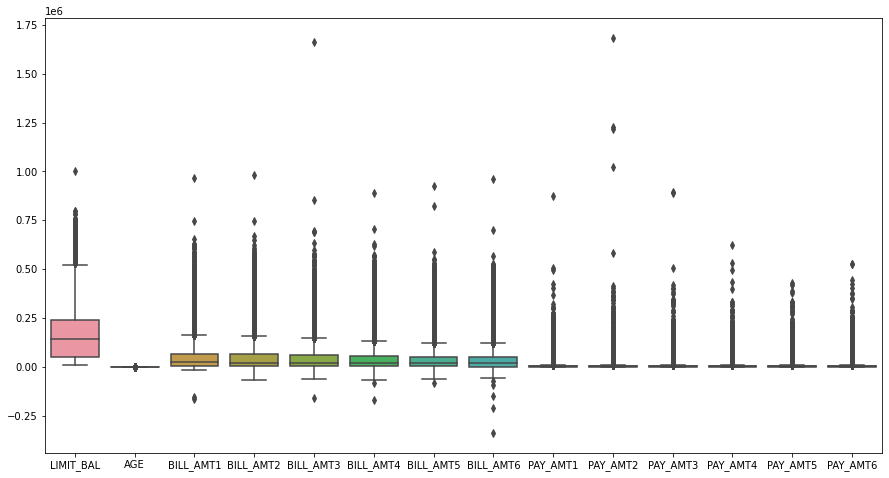

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=f_c_numeric, ax=ax)
plt.show()

### Modelamiento

In [51]:
X = df.drop('DEFAULT', axis=1)
y = df['DEFAULT']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [53]:
X_train.shape, y_train.shape

((21000, 23), (21000,))

In [54]:
X_test.shape, y_test.shape

((9000, 23), (9000,))

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled.shape, y_train.shape

((21000, 23), (21000,))

In [57]:
scaler.mean_, scaler.var_

(array([ 1.67499143e+05,  1.60357143e+00,  1.85685714e+00,  1.55333333e+00,
         3.54280476e+01, -1.51904762e-02, -1.33857143e-01, -1.65809524e-01,
        -2.20142857e-01, -2.70714286e-01, -2.90666667e-01,  5.11942188e+04,
         4.91408039e+04,  4.69834147e+04,  4.33144442e+04,  4.03257645e+04,
         3.88376780e+04,  5.65430671e+03,  5.91290243e+03,  5.25224452e+03,
         4.87620138e+03,  4.81956000e+03,  5.23414143e+03]),
 array([1.68386853e+10, 2.39272959e-01, 6.32367265e-01, 2.72488889e-01,
        8.43562514e+01, 1.26210258e+00, 1.43955846e+00, 1.42650720e+00,
        1.34987046e+00, 1.26323759e+00, 1.31237003e+00, 5.42170516e+09,
        5.06388854e+09, 4.72313953e+09, 4.15090845e+09, 3.72190542e+09,
        3.54641996e+09, 2.69766736e+08, 4.28564326e+08, 3.24579332e+08,
        2.38971268e+08, 2.29694068e+08, 3.11517137e+08]))

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.66      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



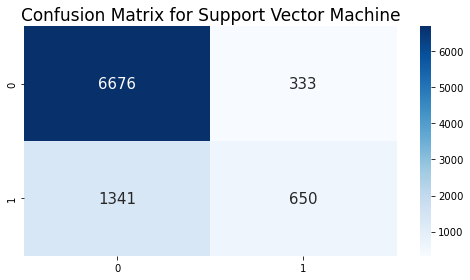

Precisión en el conjunto de entrenamiento: 0.8268095238095238
Precisión en el conjunto de prueba: 0.814


In [59]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el modelo SVC con los valores finales del Grid Search
best_svm_model = SVC(C=1, kernel='rbf', gamma='scale')
best_svm_model.fit(X_train_scaled, y_train)  # Usar las variables originales

# Predecir en el conjunto de prueba
y_pred_svc = best_svm_model.predict(X_test_scaled)

# Mostrar el informe de clasificación
print("Classification Report for Support Vector Machine:\n", classification_report(y_test, y_pred_svc))

# Crear la matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred_svc)

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize": 15})
plt.title('Confusion Matrix for Support Vector Machine', fontsize=17)
plt.tight_layout()
plt.show()

# Evaluar y mostrar la precisión en el conjunto de entrenamiento
y_train_pred = best_svm_model.predict(X_train_scaled)  # Usar las variables originales
train_accuracy = accuracy_score(y_train, y_train_pred)  # Usar las variables originales
print("Precisión en el conjunto de entrenamiento:", train_accuracy)

# Evaluar y mostrar la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred_svc)
print("Precisión en el conjunto de prueba:", test_accuracy)

### Interpretación

Resumen de métricas:
- En cuanto al Accuracy, se puede decir que el SVM tiene un valor alto (0.81)
- En cuanto a la Precisión se observa que el SVM tiene 0.66
- En Recall es bajo (0.33)
- El F1-Score nos señala que el valor del SVM es 0.44 (medio)

Ahora, al interpretar las métricas para nuestro caso de aplicación, nosotros estamos haciendo un análisis para credit scoring, en el cual, el objetivo más importante es poder identificar a los clientes con mayor riesgo de impago y así el banco pueda evitar tener pérdidas. Por lo tanto la variable más importante para nosotros es la precisión ya que si esta es alta, nos va a garantizar que las personas calificadas como no pagadoras tengan una alta probabilidad de ser realmente no pagadoras.

Dada esta consideración, el modelo de SVM tiene 0.66 de precision, lo cual es medianamente alto.

El recall es bajo, lo cual es preocupante porque se podría aprobar créditos a personas que no son cumplidoras, lo que resultará en pérdidas para el banco.

El F1-Score es importante también porque califica el rendimiento del modelo combinando la precisión y el recall

Se puede concluir que el modelo del SVM sería equilibrado, ya que tiene un Accuracy alto (0.81), una precisión media-alta (0.66) que es la métrica más importante, y el F1-Score más alto de los tres modelos comparados (0.44).